# WeatherPy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2200)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

799


In [4]:
resps=[]
counter=0
cities_index=0
while counter<=505:
    city=cities[cities_index]
    api='https://api.openweathermap.org/data/2.5/weather?q={}&appid=1ce4c75861f636843cb0568083fc765d&units=imperial'.format(city)
    resp=requests.get(api).json()
    if len(resp)!=2:
        resps.append(resp)  
        counter+=1
    cities_index+=1

In [68]:
df=pd.DataFrame(data=resps)
df['temp']=df['main'].apply(lambda x: x.get('temp'))
df['wind_speed']=df['wind'].apply(lambda x: x.get('speed'))
df['humidity']=df['main'].apply(lambda x: x.get('humidity'))
df['cloud%']=df['clouds'].apply(lambda x: x.get('all'))
df['lon']=df['coord'].apply(lambda x: x.get('lon'))
df['lat']=df['coord'].apply(lambda x: x.get('lat'))
gud_answer=df[['name','temp','wind_speed','humidity','cloud%','lon','lat']]
gud_answer.head()
gud_answer.to_csv('WeatherPy.csv')

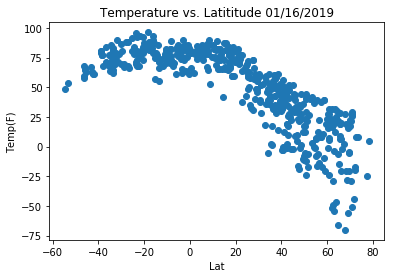

In [70]:
import datetime
today = datetime.date.today()
plt.scatter(gud_answer.lat, gud_answer.temp)
plt.title(today.strftime("Temperature vs. Latititude %m/%d/%Y"))
plt.ylabel('Temp(F)')
plt.xlabel('Lat')
plt.savefig('Temp_Lat.png')

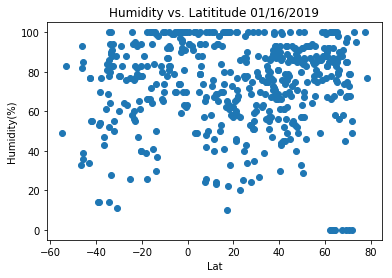

In [71]:
plt.scatter(gud_answer.lat, gud_answer.humidity)
plt.title(today.strftime("Humidity vs. Latititude %m/%d/%Y"))
plt.ylabel('Humidity(%)')
plt.xlabel('Lat')
plt.savefig('Humd_Lat.png')

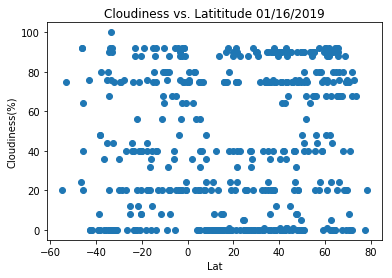

In [72]:
plt.scatter(gud_answer.lat, gud_answer['cloud%'])
plt.title(today.strftime("Cloudiness vs. Latititude %m/%d/%Y"))
plt.ylabel('Cloudiness(%)')
plt.xlabel('Lat')
plt.savefig('Cloud_Lat.png')

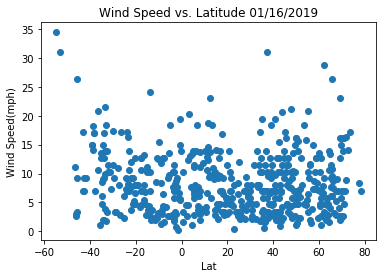

In [73]:
plt.scatter(gud_answer.lat, gud_answer.wind_speed)
plt.title(today.strftime("Wind Speed vs. Latitude %m/%d/%Y"))
plt.ylabel('Wind Speed(mph)')
plt.xlabel('Lat')
plt.savefig('Wind_Lat.png')

# Observable Trends

1. There appears to be a correlation between latitude and temperature. As latitude moves closer to 0(the equator) the average temperature rises from the latitudes closer to the poles(+-90)
2. There is very little correlation between latitude and humidity. Regardless of the latitude there is a fairly even spread of humidity. But overall, the cities tend to be closer to 100% humidity than 0
3. There is very little correlation between latitude and wind speed. Although, the more extreme wind speeds are observed at higher latitudes.